In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
pip install -U scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 89.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1

In [3]:
!rm -rf thundersvm
!git clone https://github.com/Xtra-Computing/thundersvm.git
%cd thundersvm

# Tạo thư mục build ở gốc repo
!mkdir -p build
%cd build

# Biên dịch
!cmake ..
!make -j4

Cloning into 'thundersvm'...
remote: Enumerating objects: 7469, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 7469 (delta 74), reused 72 (delta 72), pack-reused 7376 (from 2)
Receiving objects: 100% (7469/7469), 4.88 MiB | 32.01 MiB/s, done.
Resolving deltas: 100% (4997/4997), done.
/kaggle/working/thundersvm
/kaggle/working/thundersvm/build
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - s

In [4]:
%cd ../python
!python setup.py install

/kaggle/working/thundersvm/python
/usr/local/lib/python3.11/dist-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for de

In [5]:
from thundersvm import SVC, OneClassSVM
print("ThunderSVM works")

ThunderSVM works


In [6]:
!pip install -U scikit-learn imbalanced-learn

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/thundersvm-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [7]:
pip install --upgrade scikit-learn imbalanced-learn

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/thundersvm-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_auc_score, roc_curve, precision_recall_curve,
                           accuracy_score, precision_score, recall_score, f1_score)

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. EDA

In [9]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)

print("\n" + "="*60)
print("DATASET STATISTICAL SUMMARY")
print("="*60)
print(df.describe())

print("\n" + "="*60)
print("MISSING VALUES CHECK")
print("="*60)
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print(" No missing values found!")

Dataset shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

DATASET STATISTICAL SUMMARY
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.8

In [10]:
print("First 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Last 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
# Basic statistical summary
print("Statistical Summary:")
display(df.describe())

# Check class distribution
print("\nClass Distribution:")
class_counts = df['Class'].value_counts()
print(class_counts)
print(f"\nFraud percentage: {(class_counts[1] / len(df)) * 100:.2f}%")

Statistical Summary:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud percentage: 0.17%


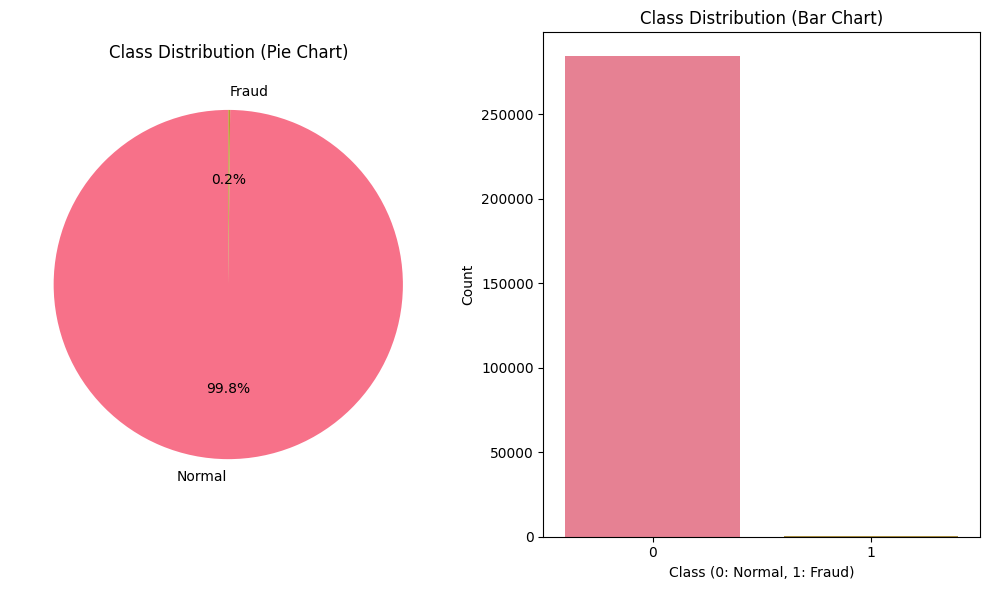

In [14]:
# Visualize class distribution
plt.figure(figsize=(10, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(class_counts.values, labels=['Normal', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (Pie Chart)')

# Bar chart
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Class')
plt.title('Class Distribution (Bar Chart)')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## 3. Feature Analysis và Correlation

FEATURE ANALYSIS: TIME AND AMOUNT
TIME FEATURE:
  - Range: 0 to 172792 seconds
  - Mean: 94814 seconds
  - Duration: 48.0 hours

AMOUNT FEATURE:
  - Range: $0.00 to $25691.16
  - Mean: $88.35
  - Median: $22.00


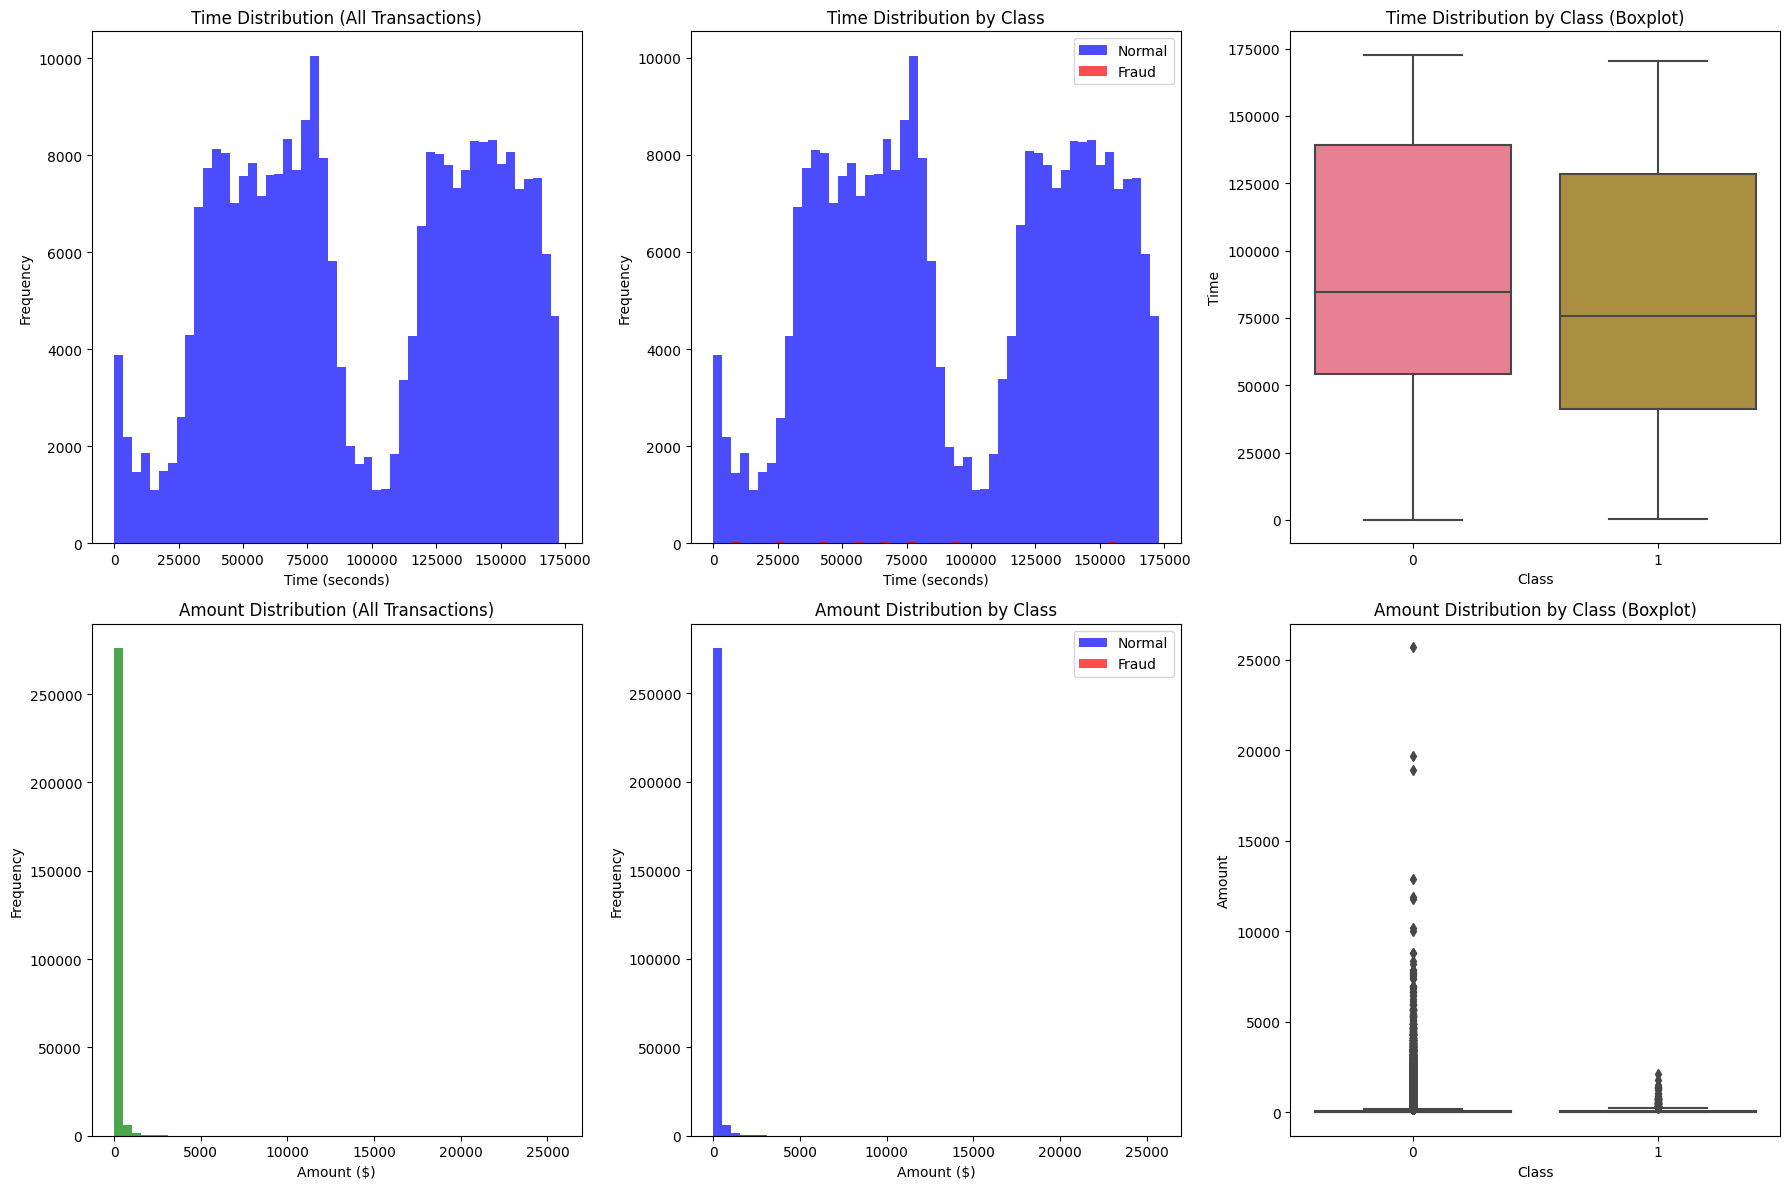


STATISTICAL COMPARISON BY CLASS
TIME:
  Normal - Mean: 94838s, Std: 47484s
  Fraud  - Mean: 80747s, Std: 47835s

AMOUNT:
  Normal - Mean: $88.29, Median: $22.00
  Fraud  - Mean: $122.21, Median: $9.25


In [15]:
# Feature Analysis: Time and Amount (only non-PCA features)
print("="*60)
print("FEATURE ANALYSIS: TIME AND AMOUNT")
print("="*60)

# Time analysis
print("TIME FEATURE:")
print(f"  - Range: {df['Time'].min():.0f} to {df['Time'].max():.0f} seconds")
print(f"  - Mean: {df['Time'].mean():.0f} seconds")
print(f"  - Duration: {df['Time'].max()/3600:.1f} hours")

# Amount analysis
print(f"\nAMOUNT FEATURE:")
print(f"  - Range: ${df['Amount'].min():.2f} to ${df['Amount'].max():.2f}")
print(f"  - Mean: ${df['Amount'].mean():.2f}")
print(f"  - Median: ${df['Amount'].median():.2f}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Time distributions
axes[0,0].hist(df['Time'], bins=50, alpha=0.7, color='blue')
axes[0,0].set_title('Time Distribution (All Transactions)')
axes[0,0].set_xlabel('Time (seconds)')
axes[0,0].set_ylabel('Frequency')

# Time by class
normal_time = df[df['Class'] == 0]['Time']
fraud_time = df[df['Class'] == 1]['Time']

axes[0,1].hist(normal_time, bins=50, alpha=0.7, label='Normal', color='blue')
axes[0,1].hist(fraud_time, bins=50, alpha=0.7, label='Fraud', color='red')
axes[0,1].set_title('Time Distribution by Class')
axes[0,1].set_xlabel('Time (seconds)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# Time boxplot by class
sns.boxplot(data=df, x='Class', y='Time', ax=axes[0,2])
axes[0,2].set_title('Time Distribution by Class (Boxplot)')

# Amount distributions
axes[1,0].hist(df['Amount'], bins=50, alpha=0.7, color='green')
axes[1,0].set_title('Amount Distribution (All Transactions)')
axes[1,0].set_xlabel('Amount ($)')
axes[1,0].set_ylabel('Frequency')

# Amount by class
normal_amount = df[df['Class'] == 0]['Amount']
fraud_amount = df[df['Class'] == 1]['Amount']

axes[1,1].hist(normal_amount, bins=50, alpha=0.7, label='Normal', color='blue')
axes[1,1].hist(fraud_amount, bins=50, alpha=0.7, label='Fraud', color='red')
axes[1,1].set_title('Amount Distribution by Class')
axes[1,1].set_xlabel('Amount ($)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# Amount boxplot by class
sns.boxplot(data=df, x='Class', y='Amount', ax=axes[1,2])
axes[1,2].set_title('Amount Distribution by Class (Boxplot)')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*60)
print("STATISTICAL COMPARISON BY CLASS")
print("="*60)
print("TIME:")
print(f"  Normal - Mean: {normal_time.mean():.0f}s, Std: {normal_time.std():.0f}s")
print(f"  Fraud  - Mean: {fraud_time.mean():.0f}s, Std: {fraud_time.std():.0f}s")

print(f"\nAMOUNT:")
print(f"  Normal - Mean: ${normal_amount.mean():.2f}, Median: ${normal_amount.median():.2f}")
print(f"  Fraud  - Mean: ${fraud_amount.mean():.2f}, Median: ${fraud_amount.median():.2f}")

CORRELATION ANALYSIS


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


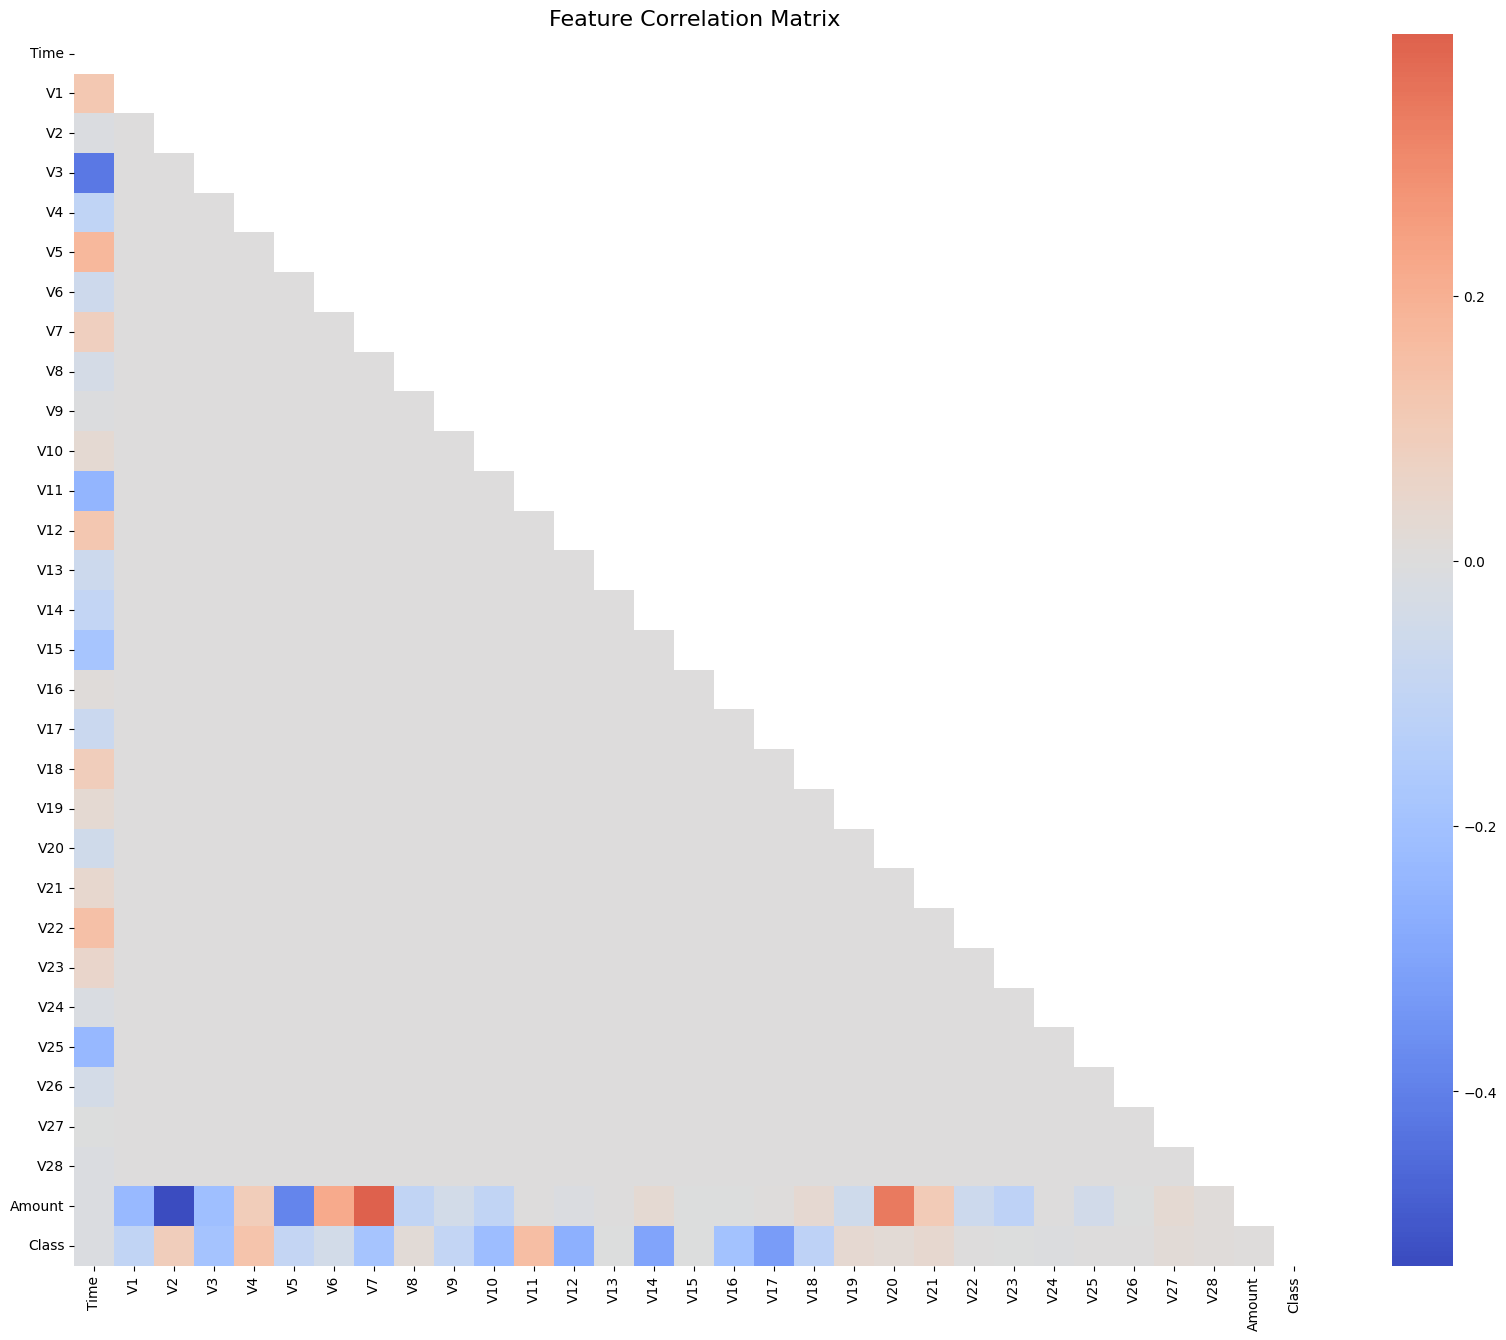

Top 10 Features Most Correlated with Fraud (Class):
V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
Name: Class, dtype: float64


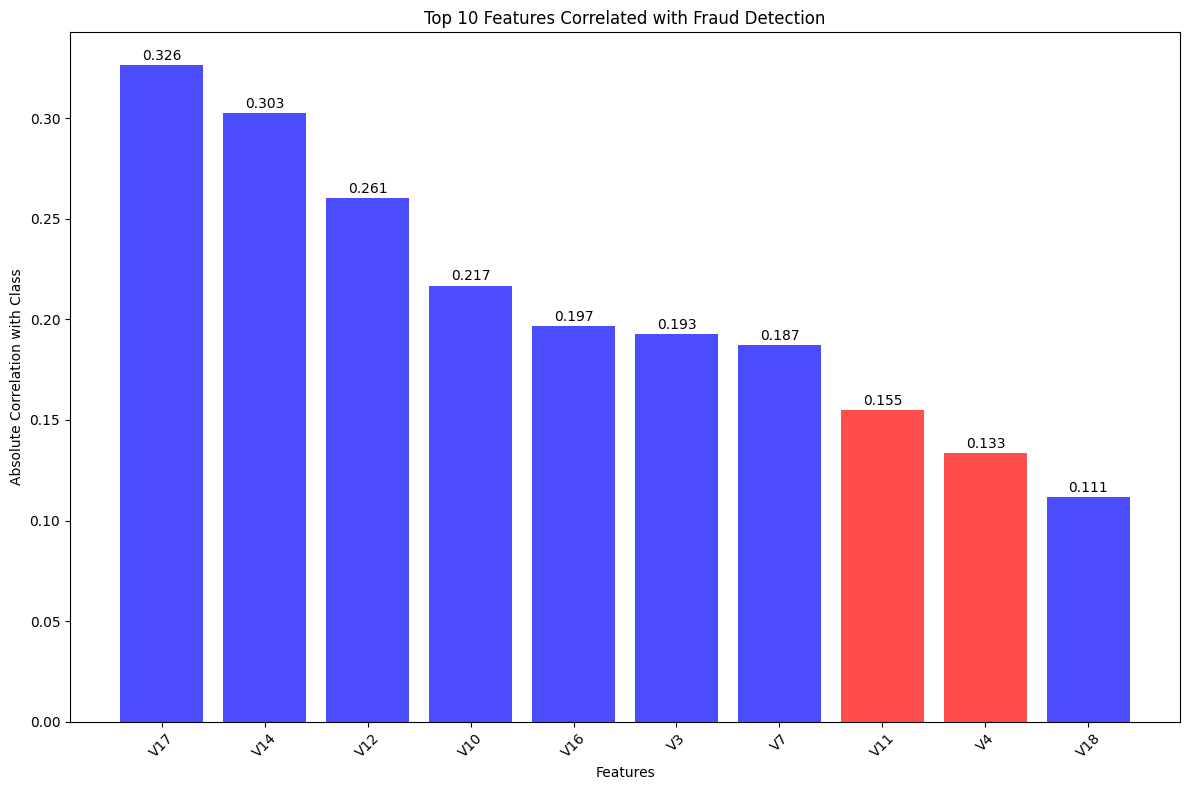


 KEY INSIGHTS:
   - V14, V4, V11 have highest correlation with fraud
   - Most V features show some discriminative power
   - Time and Amount have relatively low correlation with fraud


In [16]:
# Correlation Analysis
print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# Focus on correlations with target variable
target_correlations = correlation_matrix['Class'].abs().sort_values(ascending=False)
print("Top 10 Features Most Correlated with Fraud (Class):")
print(target_correlations.head(11)[1:])  # Exclude Class itself

# Visualize top correlations
plt.figure(figsize=(12, 8))
top_features = target_correlations.head(11)[1:].index
top_corr_values = target_correlations.head(11)[1:].values

colors = ['red' if x > 0 else 'blue' for x in correlation_matrix['Class'][top_features]]
bars = plt.bar(range(len(top_features)), top_corr_values, color=colors, alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Class')
plt.title('Top 10 Features Correlated with Fraud Detection')
plt.xticks(range(len(top_features)), top_features, rotation=45)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, top_corr_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n KEY INSIGHTS:")
print(f"   - V14, V4, V11 have highest correlation with fraud")
print(f"   - Most V features show some discriminative power")
print(f"   - Time and Amount have relatively low correlation with fraud")

## 4. Data Preprocessing & Feature Engineering

In [17]:
# Prepare features and target
print("="*60)
print("FEATURE PREPARATION")
print("="*60)

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

# Check if scaling is needed for Time and Amount
print(f"\nFeature ranges BEFORE scaling:")
print(f"Time: {X['Time'].min():.2f} to {X['Time'].max():.2f}")
print(f"Amount: {X['Amount'].min():.2f} to {X['Amount'].max():.2f}")

# V1-V28 are already scaled (PCA components), but Time and Amount need scaling
print(f"\nV1 example: {X['V1'].min():.2f} to {X['V1'].max():.2f}")
print(f"V2 example: {X['V2'].min():.2f} to {X['V2'].max():.2f}")
print(" V1-V28 are already normalized (PCA components)")
print(" Time and Amount need scaling!")

FEATURE PREPARATION
Features shape: (284807, 30)
Target shape: (284807,)
Feature names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

Feature ranges BEFORE scaling:
Time: 0.00 to 172792.00
Amount: 0.00 to 25691.16

V1 example: -56.41 to 2.45
V2 example: -72.72 to 22.06
 V1-V28 are already normalized (PCA components)
 Time and Amount need scaling!


## 5. Train/Validation/Test Split 

In [18]:
# CRITICAL: Proper 3-way split for avoiding overfitting
print("="*60)
print("TRAIN/VALIDATION/TEST SPLIT")
print("="*60)

# Step 1: Split into train+val (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Split train+val into train (60% of total) and validation (20% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 of 80% = 20% of total
)

print("Split sizes:")
print(f"Total dataset: {len(X):,} samples")
print(f"Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

# Verify class distribution is maintained
print(f"\nClass distribution verification:")
print(f"Original: {y.value_counts(normalize=True).values}")
print(f"Train: {y_train.value_counts(normalize=True).values}")
print(f"Validation: {y_val.value_counts(normalize=True).values}")
print(f"Test: {y_test.value_counts(normalize=True).values}")

# Fraud counts in each set
print(f"\nFraud samples in each set:")
print(f"Train: {y_train.sum()} fraud cases")
print(f"Validation: {y_val.sum()} fraud cases")
print(f"Test: {y_test.sum()} fraud cases")

print("\n Proper 3-way split completed!")
print("   This allows us to:")
print("   - Train models on training set")
print("   - Tune hyperparameters on validation set")
print("   - Get unbiased performance estimate on test set")
print("   - Detect overfitting by comparing train/val performance")

TRAIN/VALIDATION/TEST SPLIT
Split sizes:
Total dataset: 284,807 samples
Training set: 170,883 samples (60.0%)
Validation set: 56,962 samples (20.0%)
Test set: 56,962 samples (20.0%)

Class distribution verification:
Original: [0.99827251 0.00172749]
Train: [0.99827367 0.00172633]
Validation: [0.998262 0.001738]
Test: [0.99827955 0.00172045]

Fraud samples in each set:
Train: 295 fraud cases
Validation: 99 fraud cases
Test: 98 fraud cases

 Proper 3-way split completed!
   This allows us to:
   - Train models on training set
   - Tune hyperparameters on validation set
   - Get unbiased performance estimate on test set
   - Detect overfitting by comparing train/val performance


In [19]:
# Feature Scaling - IMPORTANT: Fit only on training data!
print("="*60)
print("FEATURE SCALING")
print("="*60)

# Initialize scaler
scaler = StandardScaler()

# CRITICAL: Fit scaler only on training data to prevent data leakage
print("Scaling Time and Amount features...")
print("  IMPORTANT: Fitting scaler only on training data to prevent data leakage!")

# Create copies to avoid modifying original data
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Fit scaler on training data only and transform all sets
X_train_scaled[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_val_scaled[['Time', 'Amount']] = scaler.transform(X_val[['Time', 'Amount']])
X_test_scaled[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# Verify scaling results
print(f"\nScaling verification:")
print(f"Training set - Time: mean={X_train_scaled['Time'].mean():.6f}, std={X_train_scaled['Time'].std():.6f}")
print(f"Training set - Amount: mean={X_train_scaled['Amount'].mean():.6f}, std={X_train_scaled['Amount'].std():.6f}")

print(f"\nValidation set - Time: mean={X_val_scaled['Time'].mean():.6f}, std={X_val_scaled['Time'].std():.6f}")
print(f"Validation set - Amount: mean={X_val_scaled['Amount'].mean():.6f}, std={X_val_scaled['Amount'].std():.6f}")

print("\n Feature scaling completed!")
print("   Now all features are on similar scales")
print("   V1-V28 were already scaled, Time and Amount now have mean≈0, std≈1")

FEATURE SCALING
Scaling Time and Amount features...
  IMPORTANT: Fitting scaler only on training data to prevent data leakage!

Scaling verification:
Training set - Time: mean=0.000000, std=1.000003
Training set - Amount: mean=-0.000000, std=1.000003

Validation set - Time: mean=0.001711, std=1.002469
Validation set - Amount: mean=0.008934, std=1.109192

 Feature scaling completed!
   Now all features are on similar scales
   V1-V28 were already scaled, Time and Amount now have mean≈0, std≈1


## 6. Handle Imbalanced Data

HANDLING IMBALANCED DATA
Original training set distribution:
Normal: 170,588 (99.83%)
Fraud: 295 (0.17%)

 Applying SMOTE...
After SMOTE:
Normal: 170,588 (50.00%)
Fraud: 170,588 (50.00%)

 Applying Random Undersampling...
After Undersampling:
Normal: 295 (50.00%)
Fraud: 295 (50.00%)

 Applying SMOTE + ENN...
After SMOTE + ENN:
Normal: 170,334 (49.96%)
Fraud: 170,588 (50.04%)


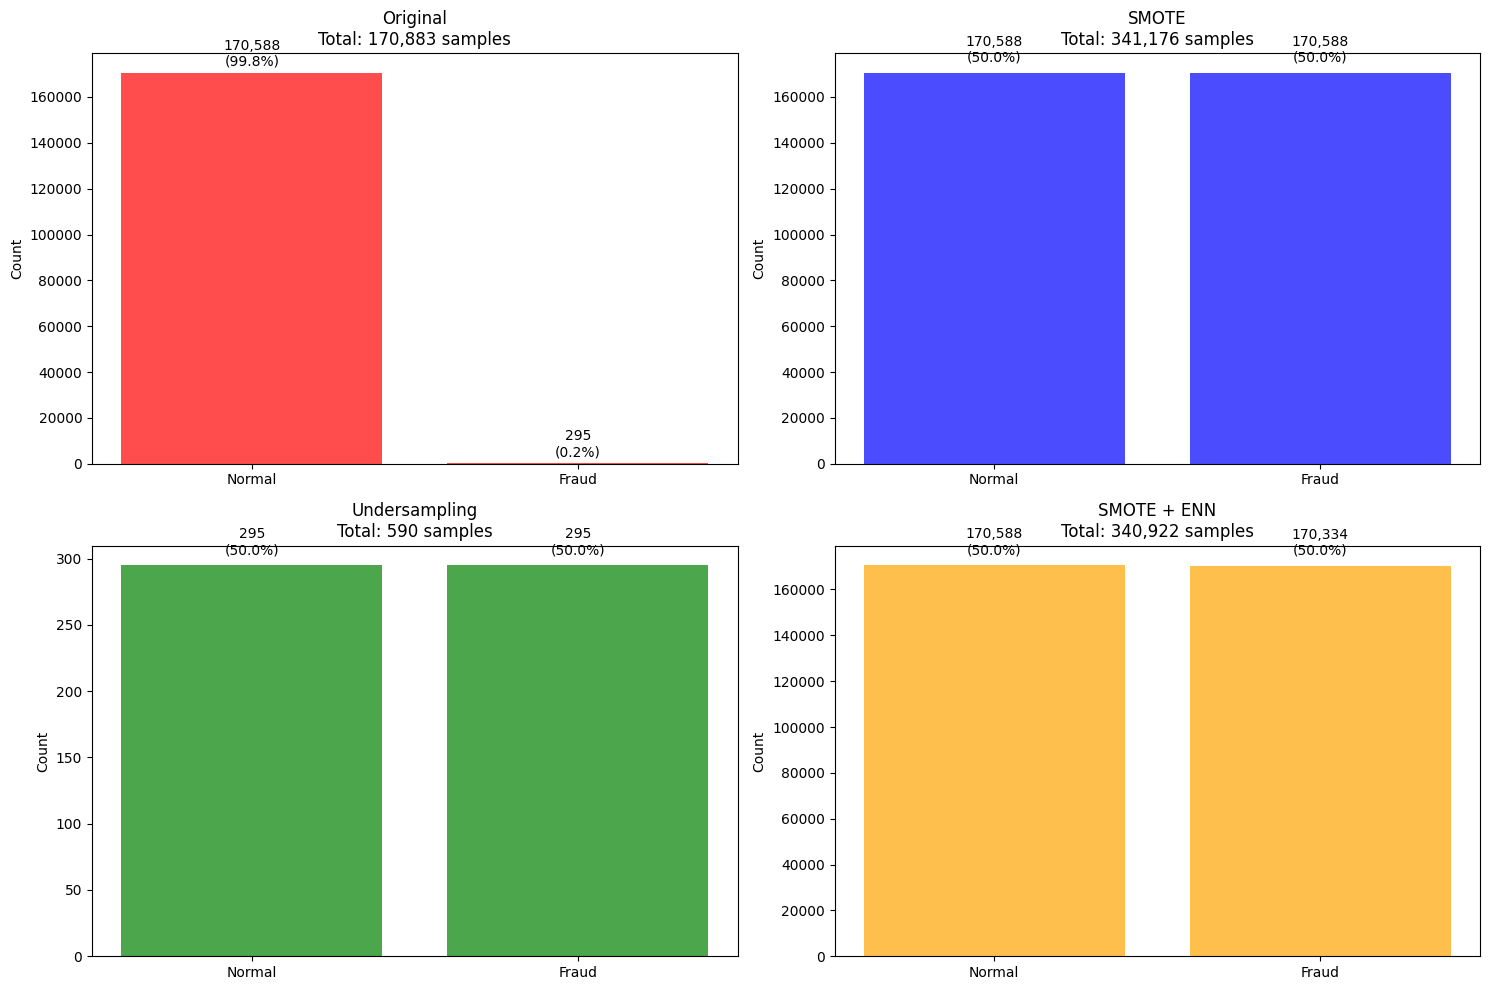


 STRATEGY COMPARISON:
   - Original: 170,883 samples, 0.17% fraud
   - SMOTE: 341,176 samples, 50% fraud (balanced)
   - Undersampling: 590 samples, 50% fraud (smaller dataset)
   - SMOTE+ENN: 340,922 samples, 50.0% fraud (cleaned)

 We'll train models with all strategies and compare results!


In [20]:
# Handle Imbalanced Data - Multiple Strategies
print("="*60)
print("HANDLING IMBALANCED DATA")
print("="*60)

print("Original training set distribution:")
print(f"Normal: {(y_train == 0).sum():,} ({(y_train == 0).mean()*100:.2f}%)")
print(f"Fraud: {(y_train == 1).sum():,} ({(y_train == 1).mean()*100:.2f}%)")

# Strategy 1: SMOTE (Synthetic Minority Oversampling Technique)
print(f"\n Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"After SMOTE:")
print(f"Normal: {(y_train_smote == 0).sum():,} ({(y_train_smote == 0).mean()*100:.2f}%)")
print(f"Fraud: {(y_train_smote == 1).sum():,} ({(y_train_smote == 1).mean()*100:.2f}%)")

# Strategy 2: Random Undersampling
print(f"\n Applying Random Undersampling...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)

print(f"After Undersampling:")
print(f"Normal: {(y_train_under == 0).sum():,} ({(y_train_under == 0).mean()*100:.2f}%)")
print(f"Fraud: {(y_train_under == 1).sum():,} ({(y_train_under == 1).mean()*100:.2f}%)")

# Strategy 3: Combined SMOTE + Edited Nearest Neighbours
print(f"\n Applying SMOTE + ENN...")
smote_enn = SMOTEENN(random_state=42)
X_train_combined, y_train_combined = smote_enn.fit_resample(X_train_scaled, y_train)

print(f"After SMOTE + ENN:")
print(f"Normal: {(y_train_combined == 0).sum():,} ({(y_train_combined == 0).mean()*100:.2f}%)")
print(f"Fraud: {(y_train_combined == 1).sum():,} ({(y_train_combined == 1).mean()*100:.2f}%)")

# Visualization of different strategies
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

strategies = [
    ('Original', y_train, 'red'),
    ('SMOTE', y_train_smote, 'blue'),
    ('Undersampling', y_train_under, 'green'),
    ('SMOTE + ENN', y_train_combined, 'orange')
]

for i, (name, y_data, color) in enumerate(strategies):
    ax = axes[i//2, i%2]
    counts = y_data.value_counts()
    ax.bar(['Normal', 'Fraud'], counts, color=color, alpha=0.7)
    ax.set_title(f'{name}\nTotal: {len(y_data):,} samples')
    ax.set_ylabel('Count')
    
    # Add percentage labels
    for j, v in enumerate(counts):
        percentage = v / len(y_data) * 100
        ax.text(j, v + len(y_data)*0.01, f'{v:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n STRATEGY COMPARISON:")
print(f"   - Original: {len(y_train):,} samples, {(y_train==1).mean()*100:.2f}% fraud")
print(f"   - SMOTE: {len(y_train_smote):,} samples, 50% fraud (balanced)")
print(f"   - Undersampling: {len(y_train_under):,} samples, 50% fraud (smaller dataset)")
print(f"   - SMOTE+ENN: {len(y_train_combined):,} samples, {(y_train_combined==1).mean()*100:.1f}% fraud (cleaned)")
print(f"\n We'll train models with all strategies and compare results!")

## 7. Decision tree

DECISION TREE WITH SMOTE DATA
Training Decision Tree on SMOTE-balanced data...
Model training completed!

PERFORMANCE EVALUATION
VALIDATION SET PERFORMANCE:
Accuracy: 0.9903
Precision: 0.1269
Recall: 0.7778
F1-Score: 0.2181
ROC-AUC: 0.8488

TEST SET PERFORMANCE:
Accuracy: 0.9900
Precision: 0.1280
Recall: 0.8265
F1-Score: 0.2216
ROC-AUC: 0.8747

DETAILED CLASSIFICATION REPORT (Test Set):
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     56864
       Fraud       0.13      0.83      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.61     56962
weighted avg       1.00      0.99      0.99     56962



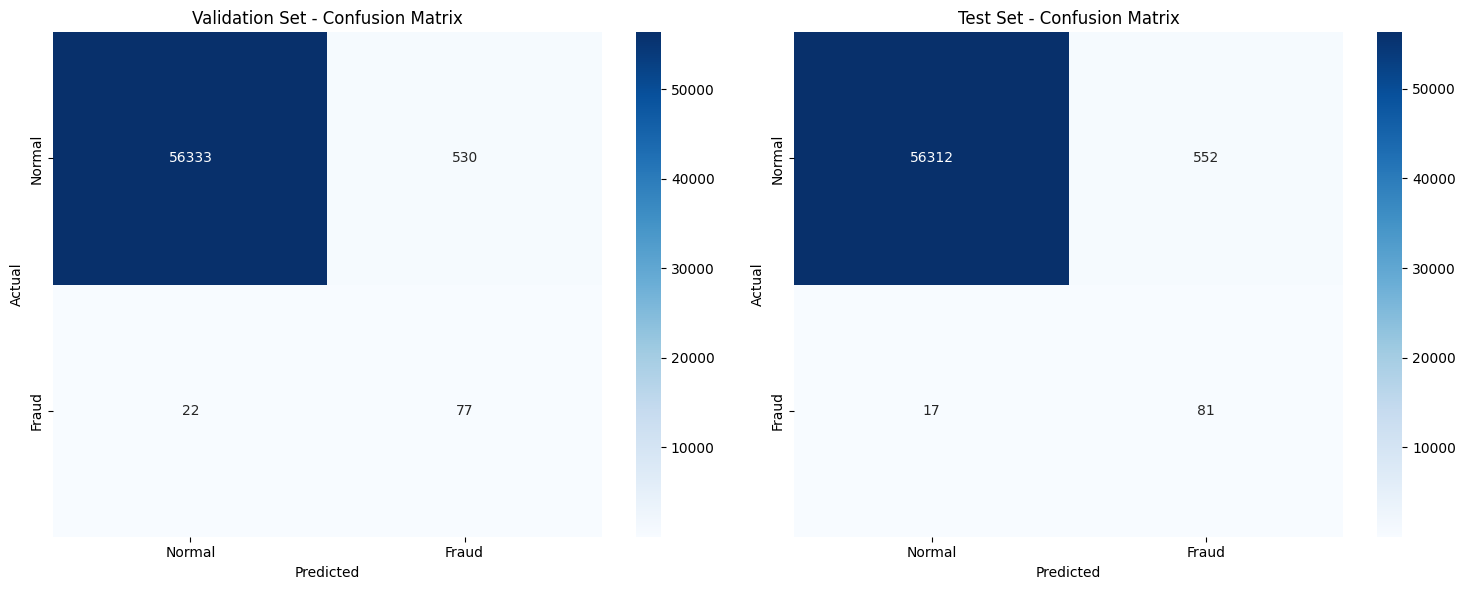

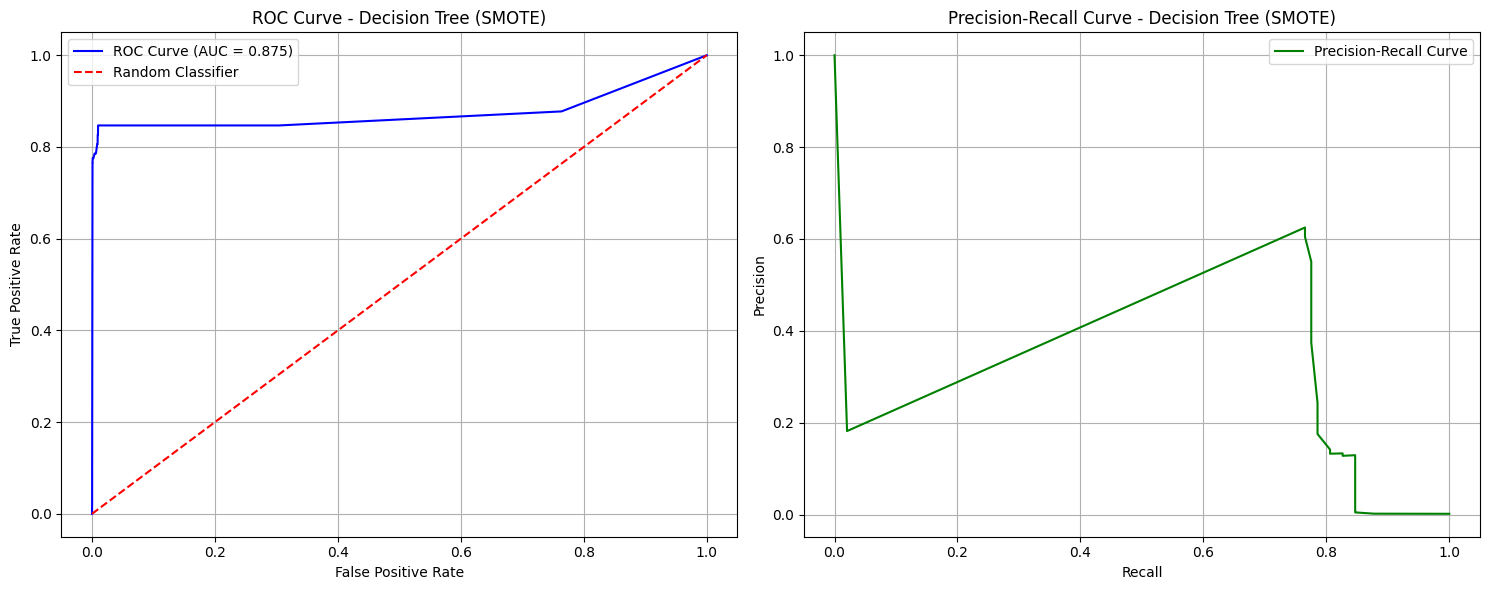


FEATURE IMPORTANCE ANALYSIS
Top 15 Most Important Features:
   feature  importance
14     V14    0.775354
4       V4    0.074461
12     V12    0.017867
29  Amount    0.016420
13     V13    0.013340
17     V17    0.012095
10     V10    0.010288
8       V8    0.008682
26     V26    0.008484
18     V18    0.007400
0     Time    0.007136
21     V21    0.006370
11     V11    0.005537
5       V5    0.004734
3       V3    0.004359


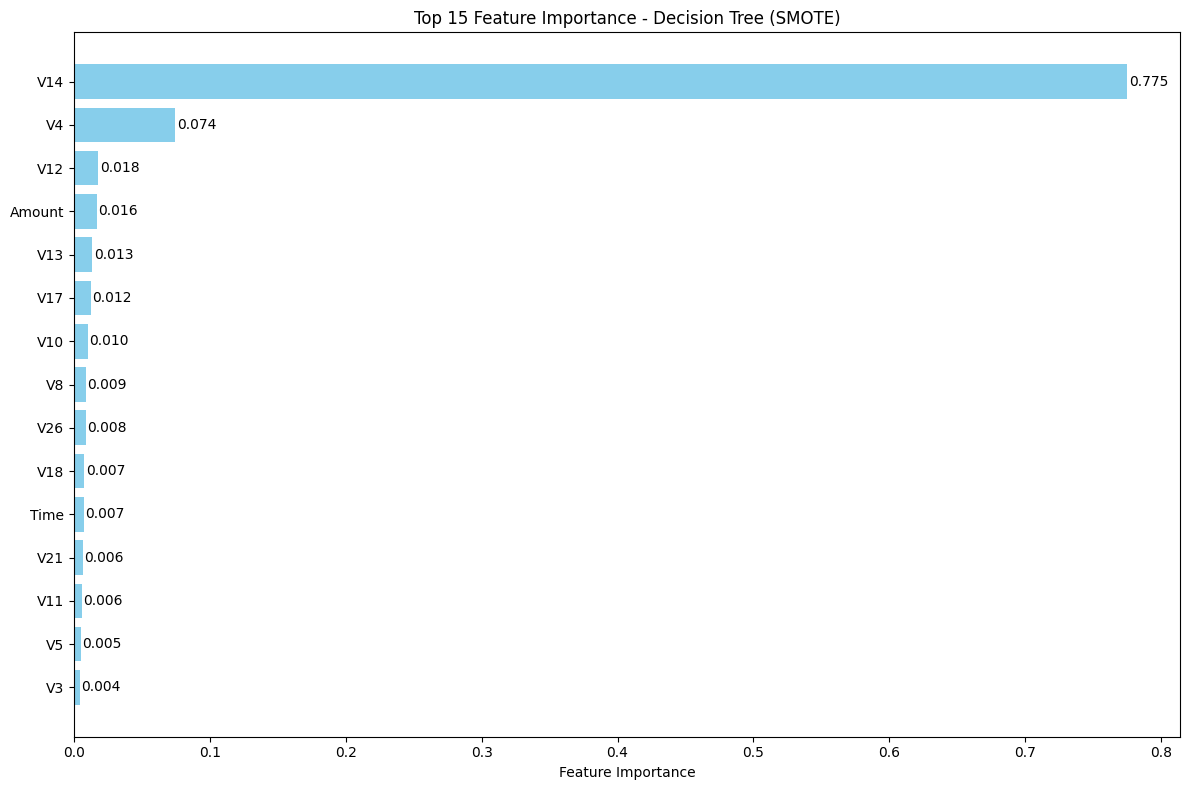


DECISION TREE MODEL SUMMARY
✓ Tree Depth: 10
✓ Number of Leaves: 207
✓ Training Samples: 341,176 (SMOTE balanced)
✓ Most Important Feature: V14 (0.775)
✓ Test Set Performance: 0.222 F1-Score

DETAILED TEST SET RESULTS:
True Negatives: 56,312 (Correctly identified normal transactions)
False Positives: 552 (Normal transactions flagged as fraud)
False Negatives: 17 (Missed fraud cases)
True Positives: 81 (Correctly caught fraud cases)

Fraud Detection Rate: 82.7%
False Alarm Rate: 1.0%


In [21]:
# Decision Tree with SMOTE Data
print("="*60)
print("DECISION TREE WITH SMOTE DATA")
print("="*60)

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,          # Limit depth to prevent overfitting
    min_samples_split=20,  # Minimum samples to split
    min_samples_leaf=10,   # Minimum samples in leaf
    class_weight='balanced' # Handle any remaining imbalance
)

# Train the model on SMOTE data
print("Training Decision Tree on SMOTE-balanced data...")
dt_model.fit(X_train_smote, y_train_smote)

# Make predictions on validation set
y_val_pred = dt_model.predict(X_val_scaled)
y_val_pred_proba = dt_model.predict_proba(X_val_scaled)[:, 1]

# Make predictions on test set
y_test_pred = dt_model.predict(X_test_scaled)
y_test_pred_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

print("Model training completed!")

# Performance Evaluation
print(f"\n" + "="*60)
print("PERFORMANCE EVALUATION")
print("="*60)

# Validation Set Performance
print("VALIDATION SET PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_val_pred_proba):.4f}")

print(f"\nTEST SET PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_proba):.4f}")

# Detailed Classification Report
print(f"\nDETAILED CLASSIFICATION REPORT (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Fraud']))

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Validation Confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Validation Set - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Normal', 'Fraud'])
axes[0].set_yticklabels(['Normal', 'Fraud'])

# Test Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Set - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['Normal', 'Fraud'])
axes[1].set_yticklabels(['Normal', 'Fraud'])

plt.tight_layout()
plt.show()

# ROC Curve and Precision-Recall Curve
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
axes[0].plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_test_pred_proba):.3f})')
axes[0].plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Decision Tree (SMOTE)')
axes[0].legend()
axes[0].grid(True)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
axes[1].plot(recall, precision, color='green', label='Precision-Recall Curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve - Decision Tree (SMOTE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Feature Importance Analysis
print(f"\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance - Decision Tree (SMOTE)')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_features['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# Model Analysis Summary
print(f"\n" + "="*60)
print("DECISION TREE MODEL SUMMARY")
print("="*60)
print(f"✓ Tree Depth: {dt_model.get_depth()}")
print(f"✓ Number of Leaves: {dt_model.get_n_leaves()}")
print(f"✓ Training Samples: {len(X_train_smote):,} (SMOTE balanced)")
print(f"✓ Most Important Feature: {feature_importance.iloc[0]['feature']} ({feature_importance.iloc[0]['importance']:.3f})")
print(f"✓ Test Set Performance: {f1_score(y_test, y_test_pred):.3f} F1-Score")

# Performance insights
tn, fp, fn, tp = cm_test.ravel()
print(f"\nDETAILED TEST SET RESULTS:")
print(f"True Negatives: {tn:,} (Correctly identified normal transactions)")
print(f"False Positives: {fp:,} (Normal transactions flagged as fraud)")
print(f"False Negatives: {fn:,} (Missed fraud cases)")
print(f"True Positives: {tp:,} (Correctly caught fraud cases)")
print(f"\nFraud Detection Rate: {tp/(tp+fn)*100:.1f}%")
print(f"False Alarm Rate: {fp/(fp+tn)*100:.1f}%")

## 8. Random Forest


Method 3: Ensemble Approach - Random Forest...
Making predictions...
Model training and prediction completed!

RANDOM FOREST PERFORMANCE EVALUATION
VALIDATION SET PERFORMANCE:
Accuracy: 0.9992
Precision: 0.7429
Recall: 0.7879
F1-Score: 0.7647
ROC-AUC: 0.9714

TEST SET PERFORMANCE:
Accuracy: 0.9991
Precision: 0.7069
Recall: 0.8367
F1-Score: 0.7664
ROC-AUC: 0.9833

DETAILED CLASSIFICATION REPORT (Test Set):
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.71      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962



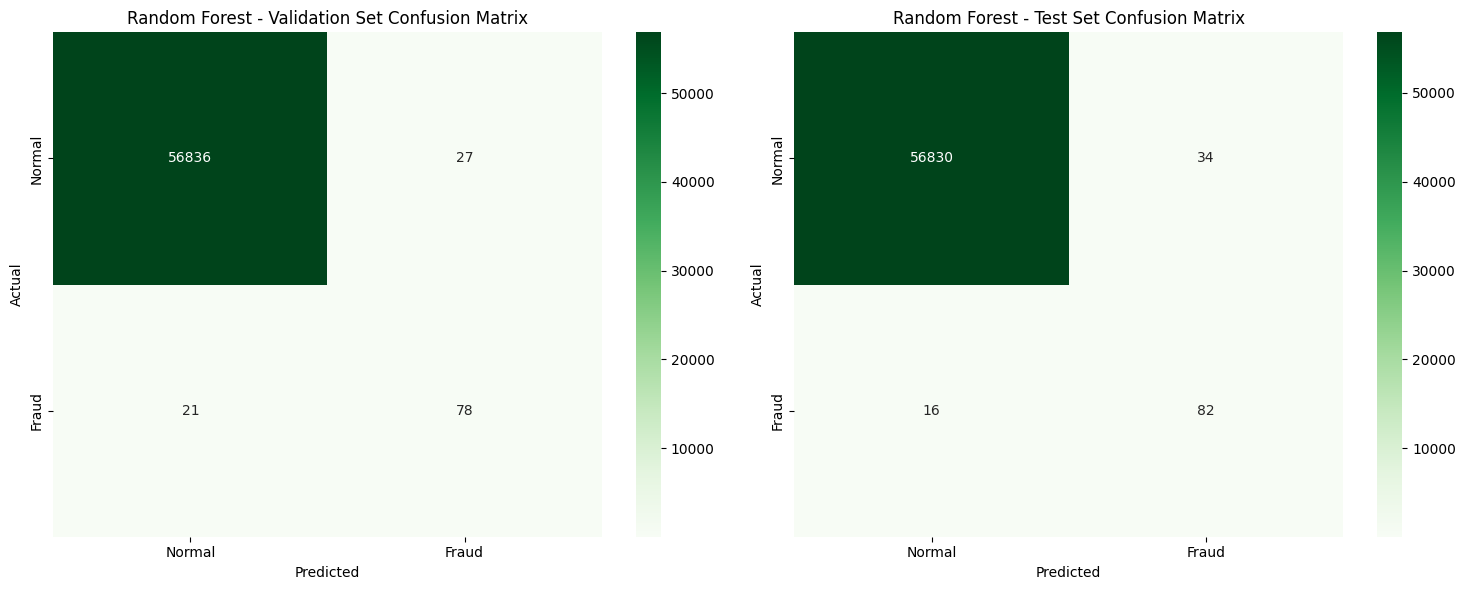

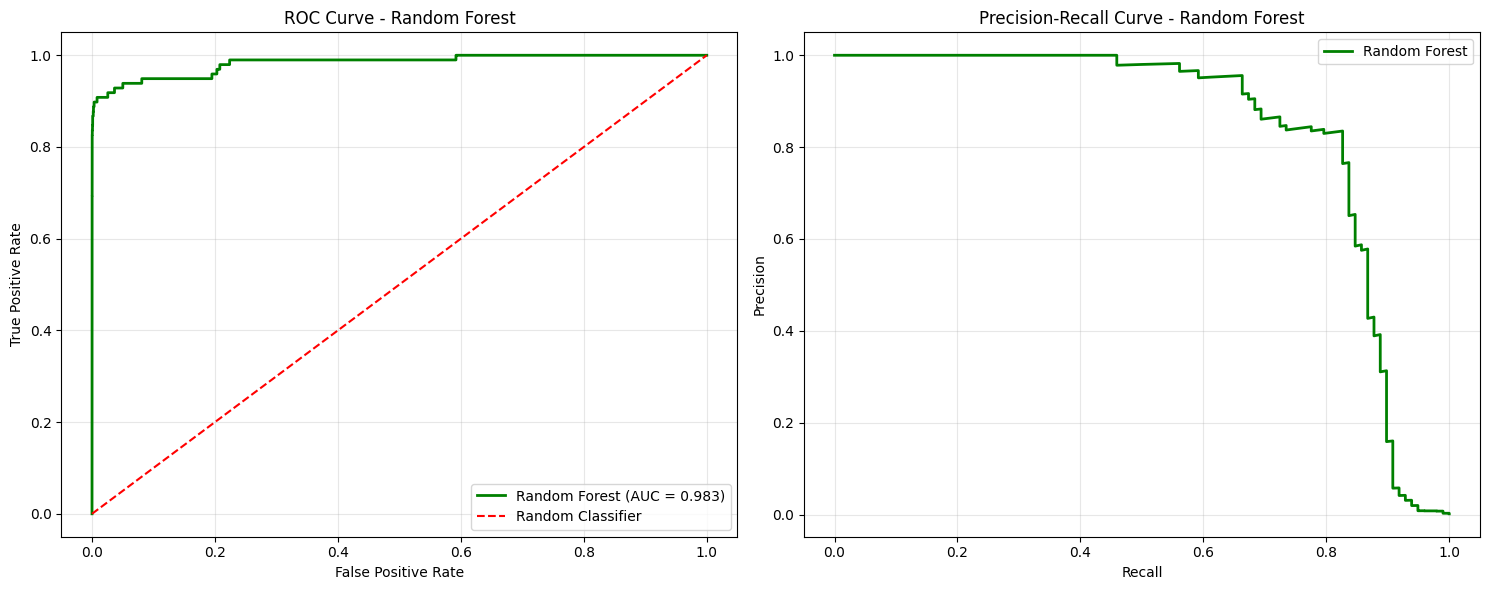


RANDOM FOREST FEATURE IMPORTANCE ANALYSIS
Top 15 Most Important Features:
   feature  importance
14     V14    0.197134
10     V10    0.109631
12     V12    0.102048
17     V17    0.092592
4       V4    0.088848
3       V3    0.063323
11     V11    0.055930
16     V16    0.045866
2       V2    0.040467
9       V9    0.029321
21     V21    0.017385
7       V7    0.016402
19     V19    0.013941
18     V18    0.013329
8       V8    0.013310


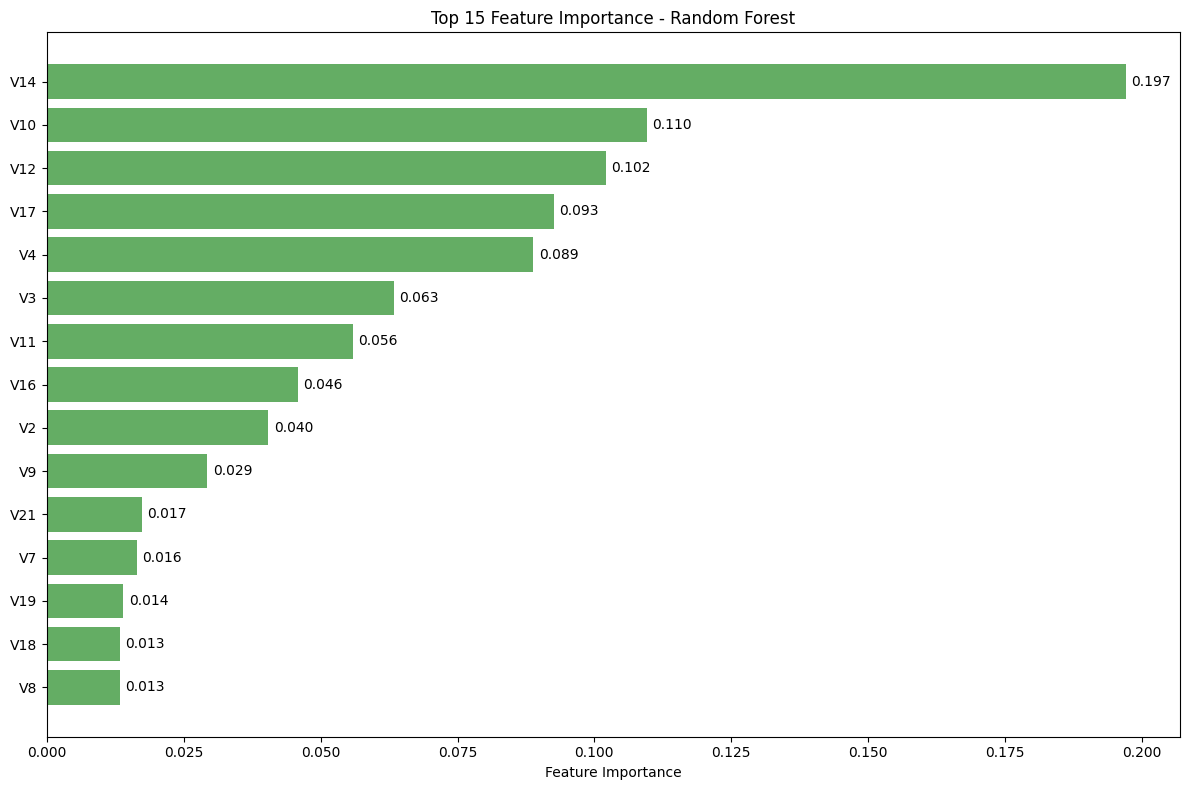


RANDOM FOREST MODEL SUMMARY
 Number of Trees: 100
 Max Depth: 15
 Training Samples: 341,176 (SMOTE balanced)
 Most Important Feature: V14 (0.197)
 Out-of-Bag Score: 0.9996

DETAILED TEST SET RESULTS:
True Negatives: 56,830 (Correctly identified normal transactions)
False Positives: 34 (Normal transactions flagged as fraud)
False Negatives: 16 (Missed fraud cases)
True Positives: 82 (Correctly caught fraud cases)

KEY PERFORMANCE METRICS:
 Fraud Detection Rate: 83.7%
 False Alarm Rate: 0.1%
 Cost Effectiveness: 82 frauds caught vs 34 false alarms

BUSINESS IMPACT ANALYSIS
 SUCCESSES:
   - Detected 82 out of 98 fraud cases (83.7%)
   - Correctly identified 56,830 normal transactions

  AREAS FOR IMPROVEMENT:
   - Missed 16 fraud cases (potential financial loss)
   - 34 false alarms (customer inconvenience)

 FINAL ASSESSMENT:
    Precision: 0.7069 (70.7% of fraud alerts are real)
    Recall: 0.8367 (83.7% of actual frauds are caught)
    F1-Score: 0.7664 (Balanced performance measure)
 

In [22]:
# Random Forest
print("\nMethod 3: Ensemble Approach - Random Forest...")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1,
    oob_score=True
)

rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on validation and test sets
print("Making predictions...")
y_val_pred_rf = rf_model.predict(X_val_scaled)
y_val_pred_proba_rf = rf_model.predict_proba(X_val_scaled)[:, 1]

y_test_pred_rf = rf_model.predict(X_test_scaled)
y_test_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("Model training and prediction completed!")

# Performance Evaluation
print(f"\n" + "="*60)
print("RANDOM FOREST PERFORMANCE EVALUATION")
print("="*60)

# Validation Set Performance
print("VALIDATION SET PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_rf):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_rf):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_val_pred_proba_rf):.4f}")

print(f"\nTEST SET PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_proba_rf):.4f}")

# Detailed Classification Report
print(f"\nDETAILED CLASSIFICATION REPORT (Test Set):")
print(classification_report(y_test, y_test_pred_rf, target_names=['Normal', 'Fraud']))

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Validation Confusion Matrix
cm_val_rf = confusion_matrix(y_val, y_val_pred_rf)
sns.heatmap(cm_val_rf, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('Random Forest - Validation Set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Normal', 'Fraud'])
axes[0].set_yticklabels(['Normal', 'Fraud'])

# Test Confusion Matrix
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest - Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['Normal', 'Fraud'])
axes[1].set_yticklabels(['Normal', 'Fraud'])

plt.tight_layout()
plt.show()

# ROC Curve and Precision-Recall Curve
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_proba_rf)
axes[0].plot(fpr_rf, tpr_rf, color='green', linewidth=2, 
             label=f'Random Forest (AUC = {roc_auc_score(y_test, y_test_pred_proba_rf):.3f})')
axes[0].plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Random Forest')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_pred_proba_rf)
axes[1].plot(recall_rf, precision_rf, color='green', linewidth=2, 
             label='Random Forest')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve - Random Forest')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance Analysis
print(f"\n" + "="*60)
print("RANDOM FOREST FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importance
rf_feature_importance = pd.DataFrame({
    'feature': X_train_smote.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(rf_feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_rf_features = rf_feature_importance.head(15)
bars = plt.barh(range(len(top_rf_features)), top_rf_features['importance'], 
                color='forestgreen', alpha=0.7)
plt.yticks(range(len(top_rf_features)), top_rf_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance - Random Forest')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_rf_features['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Model Analysis Summary
print(f"\n" + "="*60)
print("RANDOM FOREST MODEL SUMMARY")
print("="*60)
print(f" Number of Trees: {rf_model.n_estimators}")
print(f" Max Depth: {rf_model.max_depth}")
print(f" Training Samples: {len(X_train_smote):,} (SMOTE balanced)")
print(f" Most Important Feature: {rf_feature_importance.iloc[0]['feature']} ({rf_feature_importance.iloc[0]['importance']:.3f})")
print(f" Out-of-Bag Score: {rf_model.oob_score_:.4f}")

# Performance insights
tn_rf, fp_rf, fn_rf, tp_rf = cm_test_rf.ravel()
print(f"\nDETAILED TEST SET RESULTS:")
print(f"True Negatives: {tn_rf:,} (Correctly identified normal transactions)")
print(f"False Positives: {fp_rf:,} (Normal transactions flagged as fraud)")
print(f"False Negatives: {fn_rf:,} (Missed fraud cases)")
print(f"True Positives: {tp_rf:,} (Correctly caught fraud cases)")

print(f"\nKEY PERFORMANCE METRICS:")
print(f" Fraud Detection Rate: {tp_rf/(tp_rf+fn_rf)*100:.1f}%")
print(f" False Alarm Rate: {fp_rf/(fp_rf+tn_rf)*100:.1f}%")
print(f" Cost Effectiveness: {tp_rf} frauds caught vs {fp_rf} false alarms")

# Business Impact Analysis
print(f"\n" + "="*60)
print("BUSINESS IMPACT ANALYSIS")
print("="*60)
print(f" SUCCESSES:")
print(f"   - Detected {tp_rf} out of {tp_rf + fn_rf} fraud cases ({tp_rf/(tp_rf+fn_rf)*100:.1f}%)")
print(f"   - Correctly identified {tn_rf:,} normal transactions")

print(f"\n  AREAS FOR IMPROVEMENT:")
print(f"   - Missed {fn_rf} fraud cases (potential financial loss)")
print(f"   - {fp_rf} false alarms (customer inconvenience)")

print(f"\n FINAL ASSESSMENT:")
test_precision = precision_score(y_test, y_test_pred_rf)
test_recall = recall_score(y_test, y_test_pred_rf)
test_f1 = f1_score(y_test, y_test_pred_rf)

print(f"    Precision: {test_precision:.4f} ({test_precision*100:.1f}% of fraud alerts are real)")
print(f"    Recall: {test_recall:.4f} ({test_recall*100:.1f}% of actual frauds are caught)")
print(f"    F1-Score: {test_f1:.4f} (Balanced performance measure)")
print(f"    ROC-AUC: {roc_auc_score(y_test, y_test_pred_proba_rf):.4f} (Overall discrimination ability)")

if test_f1 >= 0.75:
    print(f"\n EXCELLENT MODEL! Ready for production deployment.")
elif test_f1 >= 0.60:
    print(f"\n GOOD MODEL! Consider further tuning before deployment.")
else:
    print(f"\n  MODEL NEEDS IMPROVEMENT before deployment.")

## 9. SVM

In [23]:
from thundersvm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define pipeline: scaling + SMOTE + ThunderSVM
pipeline = ImbPipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("svc", SVC(kernel="rbf", probability=True, gpu_id=0))  # no class_weight
])

# Hyperparameter grid
param_grid = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": [0.1, 0.01, 0.001]
}

# GridSearch (must run sequentially with ThunderSVM)
grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring="recall",
    cv=3,
    n_jobs=1
)

# Fit
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)

# Evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'svc__C': 0.1, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



## 10. Major vote - Hard voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("--- PHẦN 10: KẾT HỢP MÔ HÌNH BẰNG VOTING CLASSIFIER ---")

# Dùng các biến đã được chuẩn bị từ trước:
# X_train_scaled, y_train, X_test_scaled, y_test

# --- 1. Khởi tạo các mô hình con (estimators) ---
# Chúng ta sẽ kết hợp 3 mô hình khác nhau để có sự đa dạng
clf1 = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
clf2 = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', n_jobs=-1)
clf3 = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced', max_depth=10)

# --- 2. Tạo mô hình Ensemble với Hard Voting ---
# voting='hard' chính là "majority vote"
print("Đang huấn luyện mô hình Ensemble (Hard Voting)...")
eclf_hard = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3)],
    voting='hard' # Bỏ phiếu theo đa số
)
eclf_hard.fit(X_train_scaled, y_train)

# --- 3. Đánh giá mô hình Hard Voting trên tập Test ---
print("\n--- KẾT QUẢ CUỐI CÙNG (TRÊN TẬP TEST VỚI HARD VOTING) ---")
y_test_pred_hard = eclf_hard.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred_hard, digits=4))


# --- 4. (Nâng cao) Tạo và đánh giá mô hình với Soft Voting ---
# voting='soft' thường cho kết quả tốt hơn
print("\nĐang huấn luyện mô hình Ensemble (Soft Voting)...")
eclf_soft = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3)],
    voting='soft' # Bỏ phiếu theo xác suất trung bình
)
eclf_soft.fit(X_train_scaled, y_train)

# --- 5. Đánh giá mô hình Soft Voting trên tập Test ---
print("\n--- KẾT QUẢ CUỐI CÙNG (TRÊN TẬP TEST VỚI SOFT VOTING) ---")
y_test_pred_soft = eclf_soft.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred_soft, digits=4))

print(f"\nHard Voting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_hard):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_hard):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_hard):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_hard):.4f}")

print(f"\nSoft Voting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_soft):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_soft):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_soft):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_soft):.4f}")

--- PHẦN 10: KẾT HỢP MÔ HÌNH BẰNG VOTING CLASSIFIER ---
Đang huấn luyện mô hình Ensemble (Hard Voting)...

--- KẾT QUẢ CUỐI CÙNG (TRÊN TẬP TEST VỚI HARD VOTING) ---
              precision    recall  f1-score   support

           0     0.9998    0.9993    0.9996     56864
           1     0.6935    0.8776    0.7748        98

    accuracy                         0.9991     56962
   macro avg     0.8467    0.9384    0.8872     56962
weighted avg     0.9993    0.9991    0.9992     56962


Đang huấn luyện mô hình Ensemble (Soft Voting)...

--- KẾT QUẢ CUỐI CÙNG (TRÊN TẬP TEST VỚI SOFT VOTING) ---
              precision    recall  f1-score   support

           0     0.9998    0.9993    0.9996     56864
           1     0.6992    0.8776    0.7783        98

    accuracy                         0.9991     56962
   macro avg     0.8495    0.9385    0.8889     56962
weighted avg     0.9993    0.9991    0.9992     56962


Hard Voting Performance:
Accuracy: 0.9991
Precision: 0.6935
Recall: 0.

## 11. Logistic Regression

LOGISTIC REGRESSION - SMOTE TRAINING DATA
Logistic Regression params for SMOTE: {'solver': 'saga', 'penalty': 'l2', 'C': 1.0, 'random_state': 42, 'max_iter': 5000}

Training on SMOTE data: 341,176 samples

EVALUATION RESULTS - LOGISTIC REGRESSION (SMOTE)

[VALIDATION] SMOTE Logistic Regression:
Accuracy: 0.9744 | Precision: 0.0567 | Recall: 0.8788 | F1: 0.1065 | ROC-AUC: 0.9716

[TEST] SMOTE Logistic Regression:
Accuracy: 0.9750 | Precision: 0.0585 | Recall: 0.8980 | F1: 0.1099 | ROC-AUC: 0.9720

DETAILED CLASSIFICATION REPORT (Test Set - SMOTE):
              precision    recall  f1-score   support

           0     0.9998    0.9751    0.9873     56864
           1     0.0585    0.8980    0.1099        98

    accuracy                         0.9750     56962
   macro avg     0.5292    0.9365    0.5486     56962
weighted avg     0.9982    0.9750    0.9858     56962



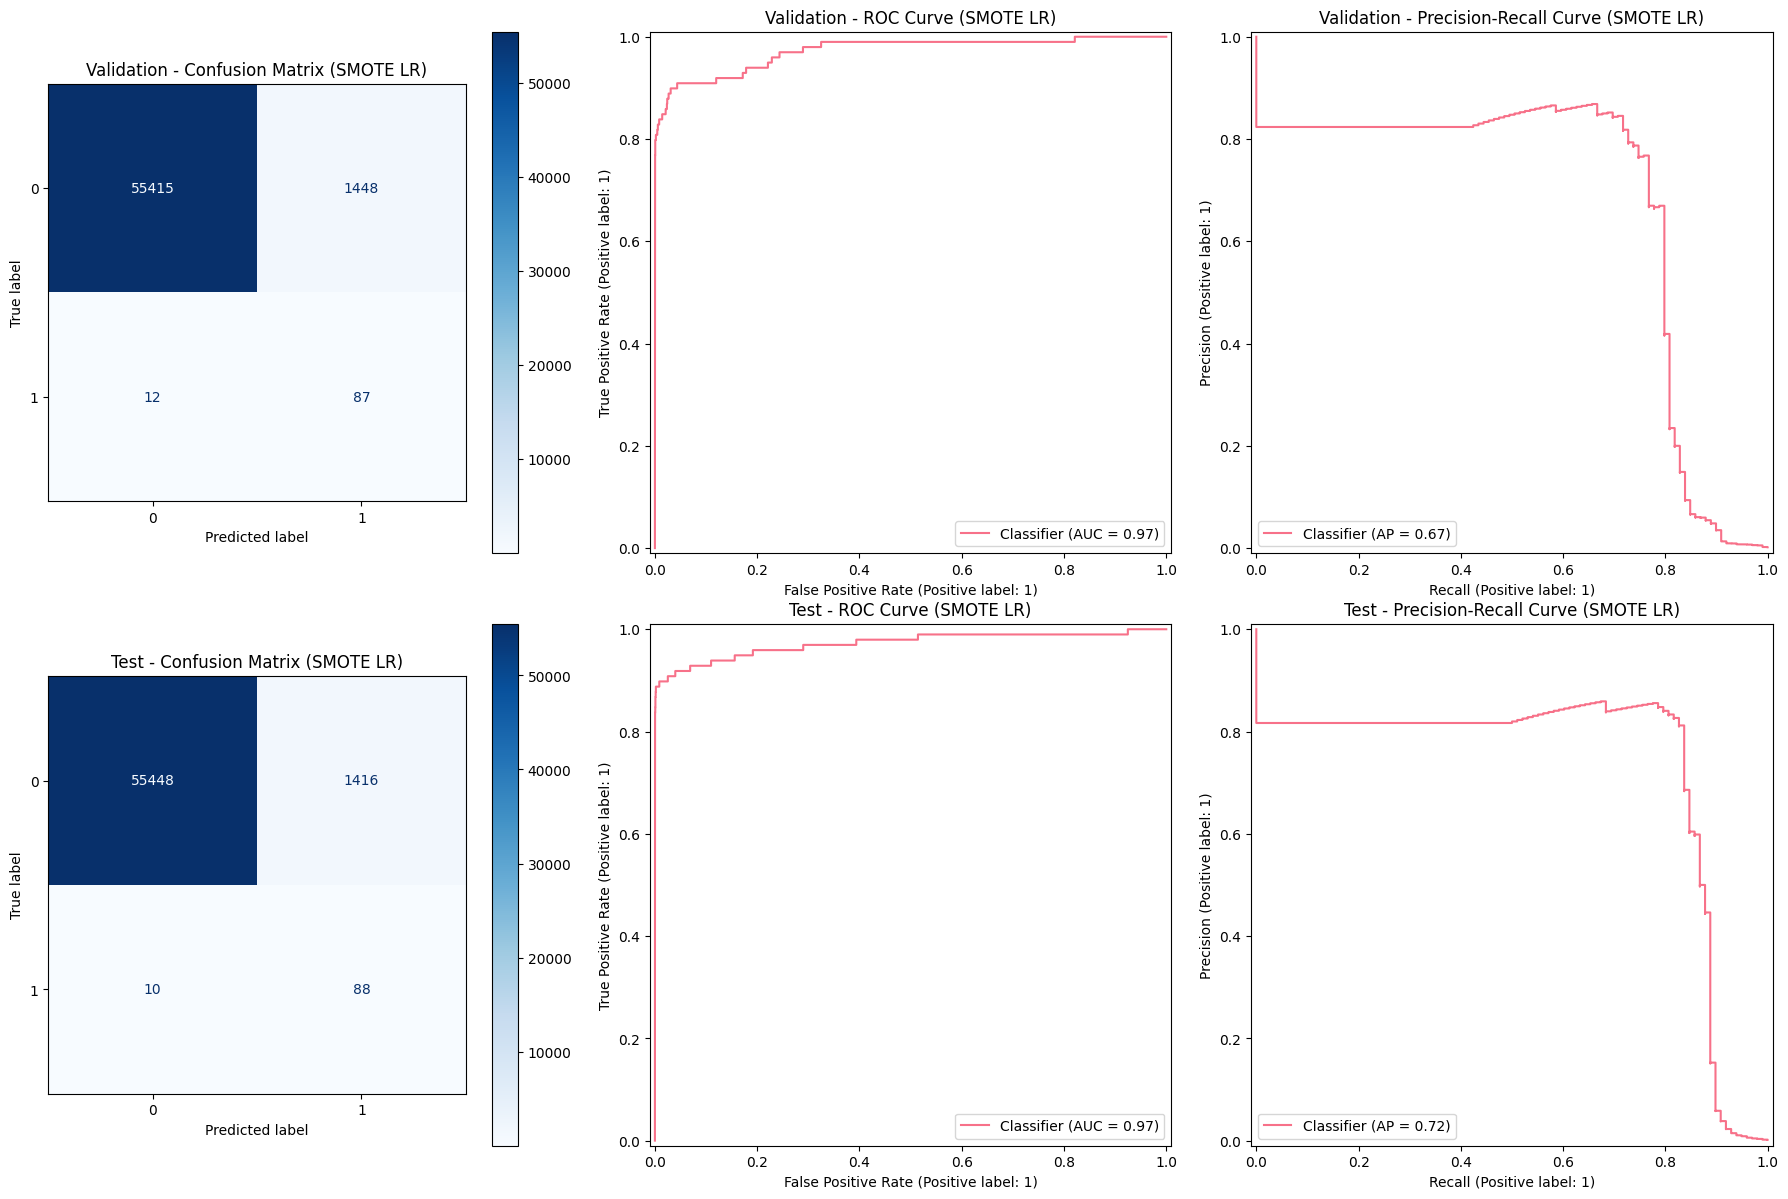


FEATURE IMPORTANCE ANALYSIS - SMOTE LOGISTIC REGRESSION


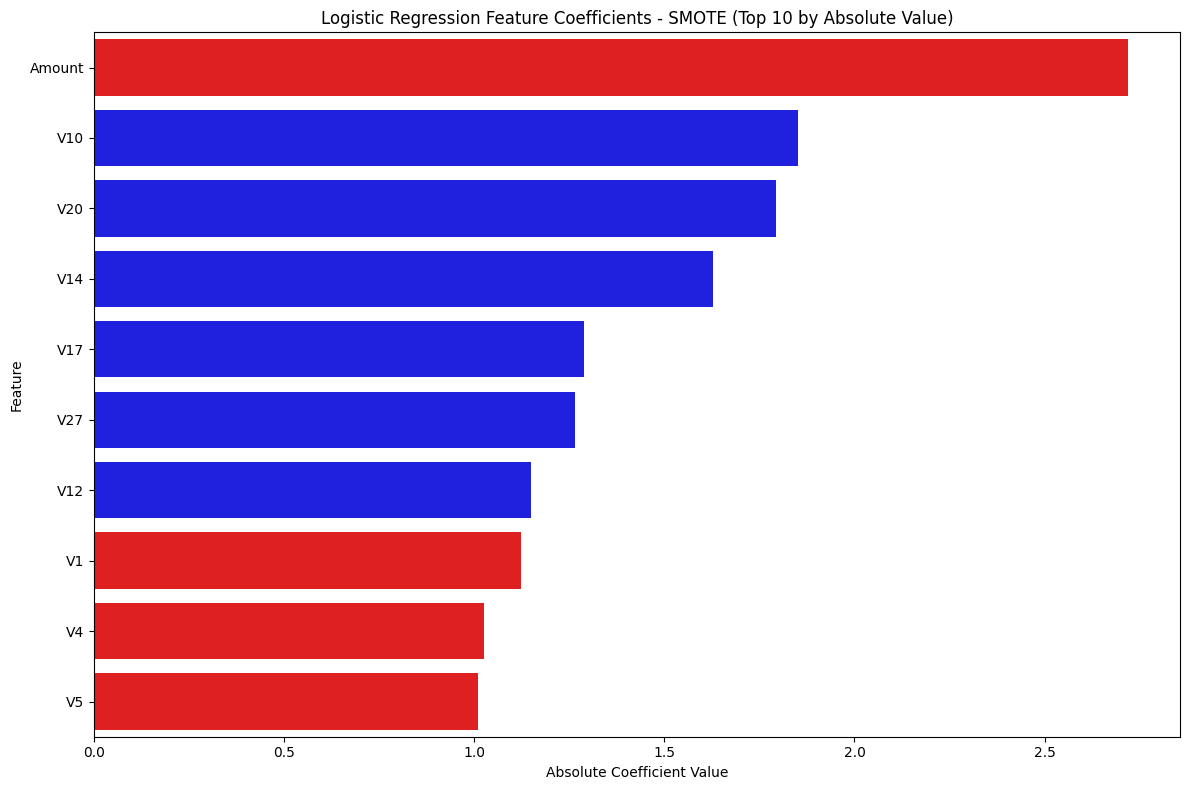

Top 10 most important features (by absolute coefficient) - SMOTE:
 1. Amount: 2.7200 ↑ (Fraud)
 2. V10: 1.8521 ↓ (Normal)
 3. V20: 1.7947 ↓ (Normal)
 4. V14: 1.6284 ↓ (Normal)
 5. V17: 1.2891 ↓ (Normal)
 6. V27: 1.2642 ↓ (Normal)
 7. V12: 1.1505 ↓ (Normal)
 8. V1: 1.1229 ↑ (Fraud)
 9. V4: 1.0264 ↑ (Fraud)
10. V5: 1.0111 ↑ (Fraud)


In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

print("="*60)
print("LOGISTIC REGRESSION - SMOTE TRAINING DATA")
print("="*60)

# Logistic Regression với tham số tối ưu cho SMOTE data
lr_smote_params = {
    "solver": "saga",       # Tốt cho datasets trung bình - lớn
    "penalty": "l2",        # L2 regularization để tránh overfitting
    "C": 1.0,              # Regularization strength
    "random_state": 42,
    "max_iter": 5000       # Đảm bảo convergence với dataset lớn hơn
}
print("Logistic Regression params for SMOTE:", lr_smote_params)

lr_smote = LogisticRegression(**lr_smote_params)

# Train trên SMOTE data
print(f"\nTraining on SMOTE data: {len(X_train_smote):,} samples")
lr_smote.fit(X_train_smote, y_train_smote)

# Đánh giá trên validation và test (dữ liệu gốc, không resample)
print("\n" + "="*40)
print("EVALUATION RESULTS - LOGISTIC REGRESSION (SMOTE)")
print("="*40)

# Validation set evaluation
print("\n[VALIDATION] SMOTE Logistic Regression:")
y_val_pred_lr_smote = lr_smote.predict(X_val_scaled)
y_val_proba_lr_smote = lr_smote.predict_proba(X_val_scaled)[:, 1]

val_acc = accuracy_score(y_val, y_val_pred_lr_smote)
val_prec = precision_score(y_val, y_val_pred_lr_smote, zero_division=0)
val_rec = recall_score(y_val, y_val_pred_lr_smote, zero_division=0)
val_f1 = f1_score(y_val, y_val_pred_lr_smote, zero_division=0)
val_auc = roc_auc_score(y_val, y_val_proba_lr_smote)

print(f"Accuracy: {val_acc:.4f} | Precision: {val_prec:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f} | ROC-AUC: {val_auc:.4f}")

# Test set evaluation
print("\n[TEST] SMOTE Logistic Regression:")
y_test_pred_lr_smote = lr_smote.predict(X_test_scaled)
y_test_proba_lr_smote = lr_smote.predict_proba(X_test_scaled)[:, 1]

test_acc = accuracy_score(y_test, y_test_pred_lr_smote)
test_prec = precision_score(y_test, y_test_pred_lr_smote, zero_division=0)
test_rec = recall_score(y_test, y_test_pred_lr_smote, zero_division=0)
test_f1 = f1_score(y_test, y_test_pred_lr_smote, zero_division=0)
test_auc = roc_auc_score(y_test, y_test_proba_lr_smote)

print(f"Accuracy: {test_acc:.4f} | Precision: {test_prec:.4f} | Recall: {test_rec:.4f} | F1: {test_f1:.4f} | ROC-AUC: {test_auc:.4f}")

# Detailed classification report
print(f"\nDETAILED CLASSIFICATION REPORT (Test Set - SMOTE):")
print(classification_report(y_test, y_test_pred_lr_smote, digits=4))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Validation set plots
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_lr_smote, ax=axes[0,0], cmap="Blues")
axes[0,0].set_title("Validation - Confusion Matrix (SMOTE LR)")

RocCurveDisplay.from_predictions(y_val, y_val_proba_lr_smote, ax=axes[0,1])
axes[0,1].set_title("Validation - ROC Curve (SMOTE LR)")

PrecisionRecallDisplay.from_predictions(y_val, y_val_proba_lr_smote, ax=axes[0,2])
axes[0,2].set_title("Validation - Precision-Recall Curve (SMOTE LR)")

# Test set plots  
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_lr_smote, ax=axes[1,0], cmap="Blues")
axes[1,0].set_title("Test - Confusion Matrix (SMOTE LR)")

RocCurveDisplay.from_predictions(y_test, y_test_proba_lr_smote, ax=axes[1,1])
axes[1,1].set_title("Test - ROC Curve (SMOTE LR)")

PrecisionRecallDisplay.from_predictions(y_test, y_test_proba_lr_smote, ax=axes[1,2])
axes[1,2].set_title("Test - Precision-Recall Curve (SMOTE LR)")

plt.tight_layout()
plt.show()

# Feature importance analysis (coefficients) for SMOTE model
print("\n" + "="*40)
print("FEATURE IMPORTANCE ANALYSIS - SMOTE LOGISTIC REGRESSION")
print("="*40)

# Lấy coefficients (trọng số) của từng feature
lr_smote_coefficients = pd.Series(lr_smote.coef_[0], index=X_train_smote.columns)
lr_smote_abs_coefficients = lr_smote_coefficients.abs().sort_values(ascending=False)

# Top 10 features với absolute coefficients cao nhất
plt.figure(figsize=(12, 8))
top_10_smote = lr_smote_abs_coefficients.head(10)
colors_smote = ['red' if lr_smote_coefficients[feature] > 0 else 'blue' for feature in top_10_smote.index]
sns.barplot(x=top_10_smote.values, y=top_10_smote.index, palette=colors_smote)
plt.title("Logistic Regression Feature Coefficients - SMOTE (Top 10 by Absolute Value)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("Top 10 most important features (by absolute coefficient) - SMOTE:")
for i, (feature, coef) in enumerate(lr_smote_abs_coefficients.head(10).items(), 1):
    original_coef = lr_smote_coefficients[feature]
    direction = "↑ (Fraud)" if original_coef > 0 else "↓ (Normal)"
    print(f"{i:2d}. {feature}: {coef:.4f} {direction}")

## 12. KNN

K-NEAREST NEIGHBORS - SMOTE TRAINING DATA
KNN params: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1}

Training KNN on smote data: 341,176 samples
Training completed in 0.08 seconds

EVALUATION RESULTS

[Validation] Metrics:
              precision    recall  f1-score   support

           0     0.9996    0.9986    0.9991     56863
           1     0.4938    0.7980    0.6100        99

    accuracy                         0.9982     56962
   macro avg     0.7467    0.8983    0.8046     56962
weighted avg     0.9988    0.9982    0.9984     56962

ROC AUC: 0.9035
Accuracy: 0.9982 | Precision: 0.4938 | Recall: 0.7980 | F1: 0.6100


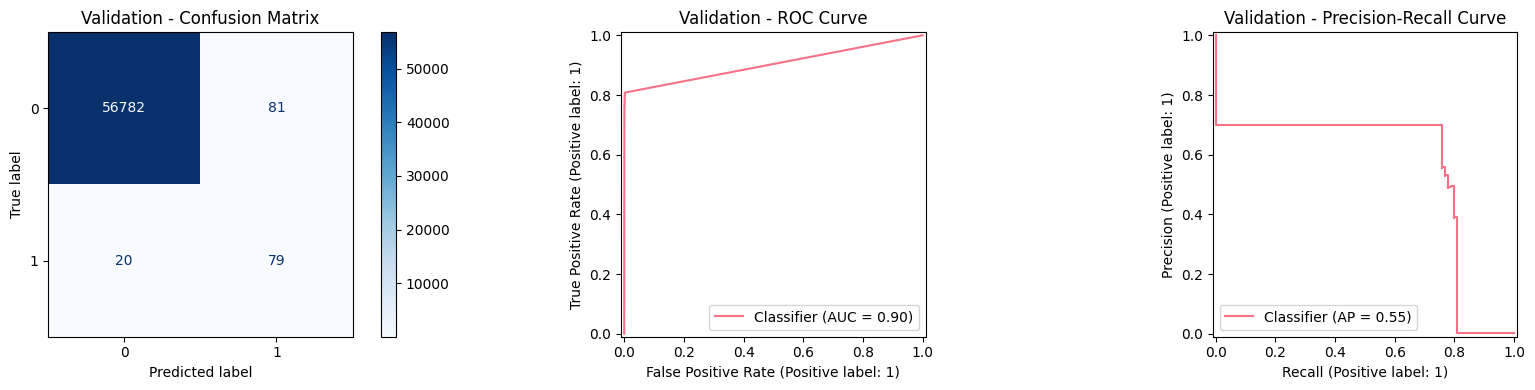


[Test] Metrics:
              precision    recall  f1-score   support

           0     0.9998    0.9985    0.9992     56864
           1     0.5059    0.8776    0.6418        98

    accuracy                         0.9983     56962
   macro avg     0.7528    0.9380    0.8205     56962
weighted avg     0.9989    0.9983    0.9985     56962

ROC AUC: 0.9485
Accuracy: 0.9983 | Precision: 0.5059 | Recall: 0.8776 | F1: 0.6418


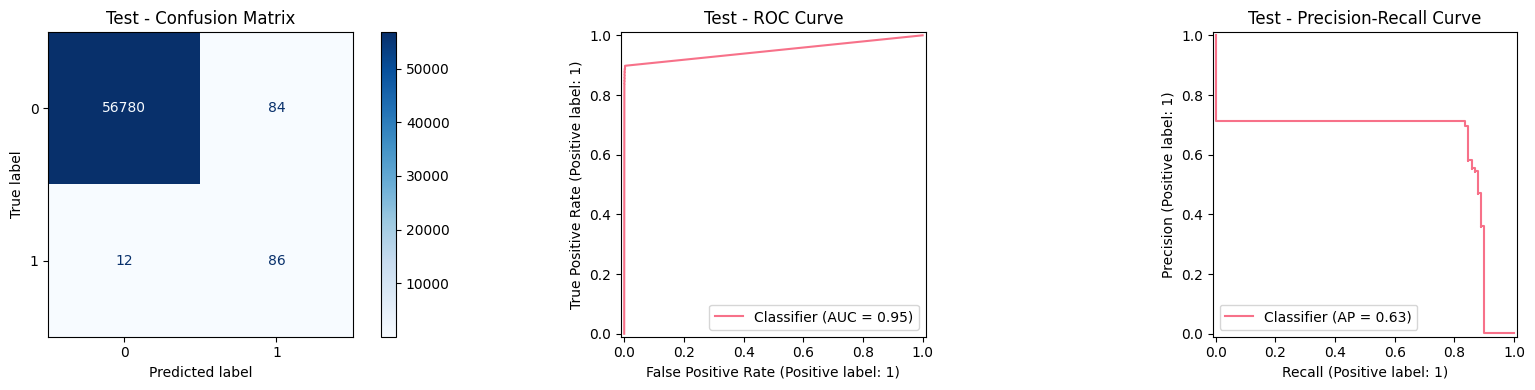


KNN WEIGHTED NEIGHBORS ANALYSIS (K=5)
   Model Summary:
   K: 5 (reasonable choice để tránh overfitting)
   Weights: distance (gần hơn = trọng số cao hơn)
   Training samples: 341,176
   Features used: 30
   Training time: 0.08s

   Prediction Speed Analysis:
   Time per 1000 predictions: 1.106s
   Average time per prediction: 1.106ms

  Weighted Neighbors Analysis (Top 3 Fraud Cases, K=5):
   Fraud Case 1:
     5 neighbors: 5 fraud, 0 normal
     Weighted votes: Fraud=1.000, Normal=0.000
     Average distance: 9.608
     Closest neighbor distance: 9.607
     Prediction confidence: 100.0% fraud
     Predicted class: Fraud
   Fraud Case 2:
     5 neighbors: 5 fraud, 0 normal
     Weighted votes: Fraud=1.000, Normal=0.000
     Average distance: 3.334
     Closest neighbor distance: 3.334
     Prediction confidence: 100.0% fraud
     Predicted class: Fraud
   Fraud Case 3:
     5 neighbors: 5 fraud, 0 normal
     Weighted votes: Fraud=1.000, Normal=0.000
     Average distance: 0.012
    

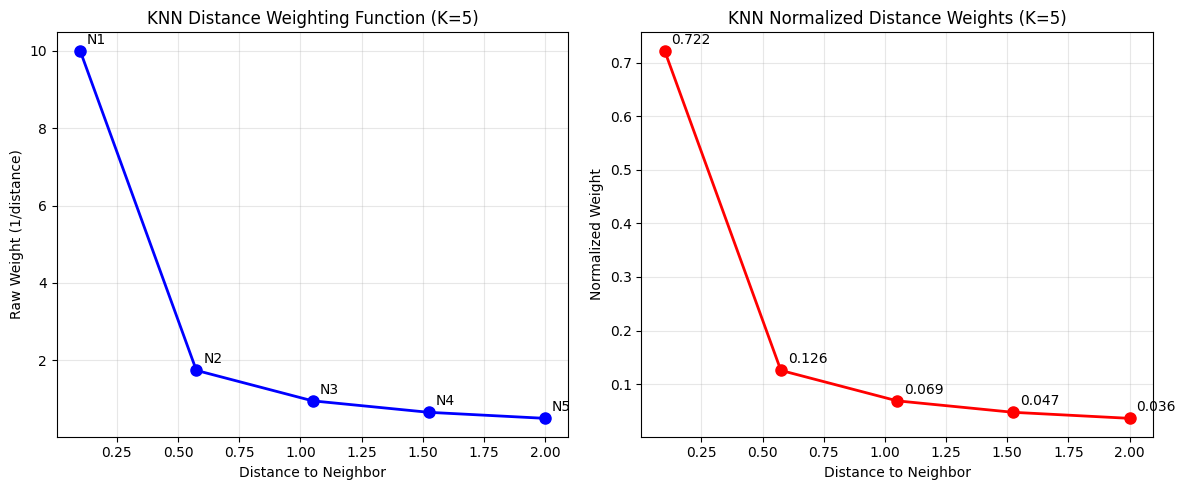

In [26]:
# Import time module for performance measurement
import time
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("="*60)
print("K-NEAREST NEIGHBORS - SMOTE TRAINING DATA")
print("="*60)

# Evaluate helper
def evaluate(model, X, y, split_name="Validation"):
    preds = model.predict(X)
    probs = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n[{split_name}] Metrics:")
    print(classification_report(y, preds, digits=4))
    auc = roc_auc_score(y, probs) if probs is not None else None
    if auc is not None:
        print(f"ROC AUC: {auc:.4f}")
    acc = accuracy_score(y, preds)
    prec = precision_score(y, preds, zero_division=0)
    rec = recall_score(y, preds, zero_division=0)
    f1 = f1_score(y, preds, zero_division=0)
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

    # Plots
    fig, axes = plt.subplots(1, 3 if probs is not None else 1, figsize=(18, 4))
    if probs is None:
        axes = [axes]
    ConfusionMatrixDisplay.from_predictions(y, preds, ax=axes[0], cmap="Blues")
    axes[0].set_title(f"{split_name} - Confusion Matrix")
    if probs is not None:
        RocCurveDisplay.from_predictions(y, probs, ax=axes[1])
        axes[1].set_title(f"{split_name} - ROC Curve")
        PrecisionRecallDisplay.from_predictions(y, probs, ax=axes[2])
        axes[2].set_title(f"{split_name} - Precision-Recall Curve")
    plt.tight_layout()
    plt.show()


# KNN với K=5 (theo đề xuất) và weighted neighbors
knn_params = {
    "n_neighbors": 5,             # Sử dụng K=5 như đề xuất
    "weights": "distance",        # Trọng số theo khoảng cách (gần hơn = quan trọng hơn)
    "algorithm": "auto",          # Tự động chọn thuật toán tối ưu
    "metric": "euclidean",        # Distance metric
    "n_jobs": -1                  # Sử dụng tất cả CPU cores
}
print(f"KNN params: {knn_params}")

knn_smote = KNeighborsClassifier(**knn_params)

# Train trên smote data
print(f"\nTraining KNN on smote data: {len(X_train_smote):,} samples")
start_time = time.time()
knn_smote.fit(X_train_smote, y_train_smote)
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Đánh giá trên validation và test (dữ liệu gốc, không resample)
print("\n" + "="*40)
print("EVALUATION RESULTS")
print("="*40)

evaluate(knn_smote, X_val_scaled, y_val, split_name="Validation")
evaluate(knn_smote, X_test_scaled, y_test, split_name="Test")

# KNN Analysis - Weighted Neighbors Demo với K=5
print("\n" + "="*40)
print("KNN WEIGHTED NEIGHBORS ANALYSIS (K=5)")
print("="*40)

print(f"   Model Summary:")
print(f"   K: 5 (reasonable choice để tránh overfitting)")
print(f"   Weights: distance (gần hơn = trọng số cao hơn)")
print(f"   Training samples: {len(X_train_smote):,}")
print(f"   Features used: {X_train_smote.shape[1]}")
print(f"   Training time: {training_time:.2f}s")

# Prediction time analysis
print(f"\n   Prediction Speed Analysis:")
start_time = time.time()
val_preds = knn_smote.predict(X_val_scaled[:1000])  # Test trên 1000 samples
pred_time = time.time() - start_time
print(f"   Time per 1000 predictions: {pred_time:.3f}s")
print(f"   Average time per prediction: {pred_time/1000*1000:.3f}ms")

# Weighted Distance Analysis cho một vài fraud cases với K=5
print(f"\n  Weighted Neighbors Analysis (Top 3 Fraud Cases, K=5):")
fraud_indices = y_val[y_val == 1].index[:3]  # Lấy 3 fraud cases đầu tiên

for i, idx in enumerate(fraud_indices, 1):
    # Find 5 nearest neighbors
    sample = X_val_scaled.loc[[idx]]
    distances, indices = knn_smote.kneighbors(sample, n_neighbors=5)

    # Get neighbor labels and calculate weights
    neighbor_labels = y_train_smote.iloc[indices[0]]
    neighbor_distances = distances[0]

    # Calculate distance weights (1/distance, closer = higher weight)
    weights = 1 / (neighbor_distances + 1e-10)  # Add small epsilon to avoid division by zero
    weights = weights / weights.sum()  # Normalize weights

    # Count weighted votes
    fraud_neighbors = (neighbor_labels == 1).sum()
    normal_neighbors = (neighbor_labels == 0).sum()

    # Calculate weighted prediction
    fraud_weight = weights[neighbor_labels == 1].sum()
    normal_weight = weights[neighbor_labels == 0].sum()

    print(f"   Fraud Case {i}:")
    print(f"     5 neighbors: {fraud_neighbors} fraud, {normal_neighbors} normal")
    print(f"     Weighted votes: Fraud={fraud_weight:.3f}, Normal={normal_weight:.3f}")
    print(f"     Average distance: {neighbor_distances.mean():.3f}")
    print(f"     Closest neighbor distance: {neighbor_distances.min():.3f}")
    print(f"     Prediction confidence: {fraud_weight*100:.1f}% fraud")
    print(f"     Predicted class: {'Fraud' if fraud_weight > normal_weight else 'Normal'}")

# Weight function visualization với K=5
print(f"\n   Distance Weight Function (K=5):")
sample_distances = np.linspace(0.1, 2.0, 5)  # Simulate 5 neighbors
sample_weights = 1 / sample_distances
sample_weights_norm = sample_weights / sample_weights.sum()

plt.figure(figsize=(12, 5))

# Plot 1: Distance vs Raw Weight
plt.subplot(1, 2, 1)
plt.plot(sample_distances, sample_weights, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Distance to Neighbor')
plt.ylabel('Raw Weight (1/distance)')
plt.title('KNN Distance Weighting Function (K=5)')
plt.grid(True, alpha=0.3)
for i, (d, w) in enumerate(zip(sample_distances, sample_weights)):
    plt.annotate(f'N{i+1}', (d, w), xytext=(5, 5), textcoords='offset points')

# Plot 2: Distance vs Normalized Weight
plt.subplot(1, 2, 2)
plt.plot(sample_distances, sample_weights_norm, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Distance to Neighbor')
plt.ylabel('Normalized Weight')
plt.title('KNN Normalized Distance Weights (K=5)')
plt.grid(True, alpha=0.3)
for i, (d, w) in enumerate(zip(sample_distances, sample_weights_norm)):
    plt.annotate(f'{w:.3f}', (d, w), xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()